# Objective : 
## Incorporate Image Normalaization

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
!ls '/content/gdrive/My Drive/Colab Notebooks/Assignment5'

 Consolidated_Model.ipynb       ImageNormalization_v2.ipynb
 ImageNormalization.ipynb      'L2 _Regularization.ipynb'
 ImageNormalization_old.ipynb   ReLU_After_BN.ipynb


In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


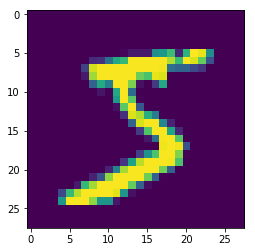

In [12]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [17]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu', use_bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu', use_bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) #7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        1728      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(lr * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0058), metrics=['accuracy'])




# model.fit(X_train, Y_train, batch_size=64, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

## MODEL CHECKPOINT FOR SAVE

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
model_path="/content/gdrive/My Drive/Colab Notebooks/Assignment5"
model_file = model_path + '/image_normalization.hd5'
checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## IMAGE NORMALIZATION

In [22]:

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)


train_datagen = datagen.flow(X_train, Y_train, batch_size=64)
test_datagen = datagen.flow(X_test, Y_test, batch_size=64)

# fits the model on batches with real-time data augmentation:
model.fit_generator(train_datagen, steps_per_epoch=len(X_train)/64, validation_data=test_datagen, validation_steps=1, epochs=40, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


938/937 [==============================] - 13s 13ms/step - loss: 0.1556 - acc: 0.9505 - val_loss: 0.0909 - val_acc: 0.9688

Epoch 00001: val_acc improved from -inf to 0.96875, saving model to /content/gdrive/My Drive/Colab Notebooks/Assignment5/image_normalization.hd5
Epoch 2/40
938/937 [==============================] - 10s 11ms/step - loss: 0.0662 - acc: 0.9789 - val_loss: 0.0853 - val_acc: 0.9688

Epoch 00002: val_acc did not improve from 0.96875
Epoch 3/40
938/937 [==============================] - 10s 11ms/step - loss: 0.0546 - acc: 0.9828 - val_loss: 0.1568 - val_acc: 0.9531

Epoch 00003: val_acc did not improve from 0.96875
Epoch 4/40
938/937 [==============================] - 11s 12ms/step - loss: 0.0494 - acc: 0.9845 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 00004: val_acc improved from 0.96875 to 1.00000, saving model to /content/gdrive/My Drive/Colab Notebooks/Assignment5/image_normalization.hd5
Epoch 5/40
938/937 [==============================] - 10s 11ms/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [24]:
print(score)

[0.029763896446594298, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [26]:
print(y_pred[:9])
print(y_test[:9])

[[2.4779250e-12 1.4086693e-13 3.5628514e-07 2.6033129e-06 5.9584857e-17
  5.7706349e-14 6.6378518e-23 9.9999690e-01 1.0269582e-10 6.1795156e-08]
 [1.7381208e-12 9.7659901e-11 1.0000000e+00 3.6753546e-14 4.1569307e-17
  1.3667420e-18 2.5316596e-11 1.2211183e-17 1.1048373e-13 9.8752382e-17]
 [1.9172832e-12 9.9994481e-01 5.9867307e-07 3.6147820e-09 1.2261870e-05
  3.5226749e-05 2.3705395e-07 6.6054340e-06 1.7528473e-07 6.0155720e-08]
 [9.9999499e-01 5.2379926e-18 1.3450094e-07 2.3517241e-12 5.2215621e-11
  4.6442850e-08 4.6645837e-06 2.3441622e-14 8.7261235e-08 7.6222868e-09]
 [4.4476907e-09 7.4192125e-17 6.7664900e-13 1.2659106e-12 9.9999607e-01
  1.8337469e-11 3.5570208e-10 3.1802672e-11 1.9648878e-09 3.8759886e-06]
 [3.3289207e-12 9.9962664e-01 3.4869001e-06 3.4853373e-10 7.9458194e-05
  3.7003750e-07 4.2693515e-08 2.8968192e-04 1.2600148e-07 2.6609499e-07]
 [1.1417904e-15 6.0821175e-09 1.5026020e-08 4.3473314e-13 9.9998343e-01
  2.5481592e-09 1.0906331e-11 4.8455949e-08 9.3217886e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()